In [2]:
import pandas as pd

# Lê o CSV
df_youtube = pd.read_csv("comentarios_youtube_com_datas (1).csv")

# Mostra as 5 primeiras linhas
df_youtube.head()


,autor,comentario,data
0,@ClubMusic80,Discover how to dance the famous Lambada ! 💃💃\...,2023-12-29T09:43:48Z
1,@mohammedalseraji5342,❤,2025-10-11T11:15:30Z
2,@MingRming,2025 กะยังพังยุ่เดี้,2025-10-11T10:44:16Z
3,@iselasalgado4230,"NUNCA ES Y NUNCA SERA IGUA, LO QUE USTED ! ACO...",2025-10-11T08:36:53Z
4,@iselasalgado4230,De esto hablo DON OMAR.,2025-10-11T08:34:15Z


In [3]:
# Total de linhas (comentários)
total_comentarios = len(df_youtube)
print("Total de comentários:", total_comentarios)

#Total de comentários: 72102


Total de comentários: 72102


In [4]:
total_comentarios_validos = df_youtube['comentario'].notna().sum()
print("Total de comentários válidos:", total_comentarios_validos)

#Total de comentários válidos: 72068

Total de comentários válidos: 72068


Função para detectar emojis

In [5]:
import pandas as pd
import emoji
import re

def apenas_emoji(texto):
    """Retorna True se o texto contiver apenas emojis (ignorando espaços)."""
    if pd.isna(texto) or str(texto).strip() == "":
        return False
    
    texto_limpo = str(texto).strip()
    texto_limpo = re.sub(r"\s+", "", texto_limpo)  # remove espaços

    emoji_count = sum(1 for ch in texto_limpo if ch in emoji.EMOJI_DATA)
    return emoji_count > 0 and emoji_count == len(texto_limpo)




Criar coluna indicando se é emoji ou texto

In [6]:
df_youtube["tipo"] = df_youtube["comentario"].apply(
    lambda x: "vazio" if pd.isna(x) or str(x).strip() == "" 
    else ("emoji" if apenas_emoji(x) else "escrito")
)


Contar quantos são emoji e quantos são escritos

In [9]:
# Contagem geral
df_youtube["tipo"].value_counts()


tipo
escrito    69390
emoji       2678
vazio         34
Name: count, dtype: int64

Verificar os resultados

In [10]:
# Distribuição percentual
df_youtube["tipo"].value_counts(normalize=True) * 100


tipo
escrito    96.238662
emoji       3.714183
vazio       0.047155
Name: proportion, dtype: float64

Visualizar exemplos

In [11]:
# Alguns exemplos de cada tipo
for tipo in ["emoji", "escrito", "vazio"]:
    print(f"\nExemplos de {tipo.upper()}:")
    display(df_youtube[df_youtube["tipo"] == tipo]["comentario"].head(5))



Exemplos de EMOJI:


1              ❤
7      ❤❤❤❤✌💃💃💃💃
19           ❤❤❤
25           ❤❤❤
109           ❤❤
Name: comentario, dtype: object


Exemplos de ESCRITO:


0    Discover how to dance the famous Lambada ! 💃💃\...
2                                2025  กะยังพังยุ่เดี้
3    NUNCA ES Y NUNCA SERA IGUA, LO QUE USTED ! ACO...
4                             De  esto hablo DON OMAR.
5                                 The Best song Ever🎉❤
Name: comentario, dtype: object


Exemplos de VAZIO:


427      NaN
5642     NaN
8336     NaN
9025     NaN
11471    NaN
Name: comentario, dtype: object

In [17]:
df_escritos = df_youtube[df_youtube["tipo"] == "escrito"].copy()


In [12]:
import pandas as pd
from langdetect import detect, DetectorFactory
import pycountry

# Fixar semente para resultados consistentes
DetectorFactory.seed = 0

In [18]:
def detecta_idioma_nome(texto):
    try:
        codigo = detect(texto)
        idioma = pycountry.languages.get(alpha_2=codigo)
        if idioma:
            return idioma.name.capitalize()
        idioma = pycountry.languages.get(alpha_3=codigo)
        if idioma:
            return idioma.name.capitalize()
        return codigo  # fallback: retorna o código se não encontrar o nome
    except:
        return "Indefinido"


In [19]:
df_escritos["idioma"] = df_escritos["comentario"].apply(detecta_idioma_nome)


In [20]:
df_escritos["idioma"].value_counts().head(50)


idioma
English                    16584
Spanish                    12428
Portuguese                  9335
Russian                     5003
Indefinido                  3949
Turkish                     1815
Italian                     1629
French                      1559
German                      1420
Somali                      1410
Indonesian                  1195
Vietnamese                   948
Romanian                     941
Tagalog                      856
Catalan                      838
Polish                       820
Arabic                       589
Estonian                     559
Croatian                     497
Swahili (macrolanguage)      483
Dutch                        462
Norwegian                    446
Hungarian                    423
Bulgarian                    415
Ukrainian                    408
Slovenian                    401
Macedonian                   392
Afrikaans                    388
Finnish                      368
Welsh                        365
Dan

In [21]:
df_youtube = df_youtube.merge(
    df_escritos[["comentario", "idioma"]],
    on="comentario",
    how="left"
)


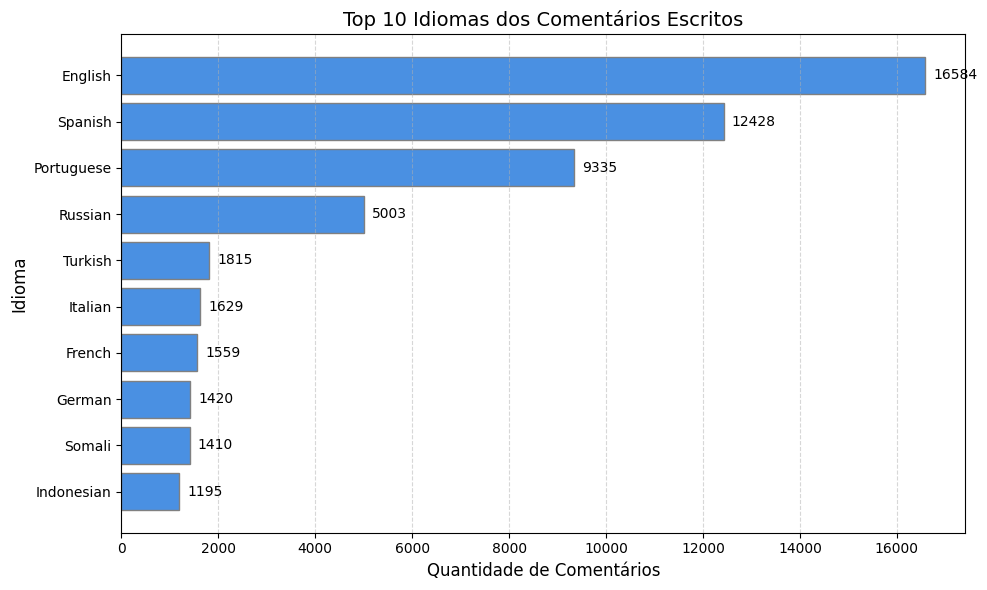

In [25]:
import matplotlib.pyplot as plt

# Filtra apenas idiomas definidos
df_plot = df_escritos[df_escritos["idioma"] != "Indefinido"]

# Top 10 idiomas
idioma_counts = df_plot["idioma"].value_counts().head(10).sort_values(ascending=True)

# Gráfico horizontal
plt.figure(figsize=(10,6))
plt.barh(idioma_counts.index, idioma_counts.values, color="#4A90E2", edgecolor="gray")

plt.title("Top 10 Idiomas dos Comentários Escritos", fontsize=14)
plt.xlabel("Quantidade de Comentários", fontsize=12)
plt.ylabel("Idioma", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Exibir os valores no final das barras
for i, v in enumerate(idioma_counts.values):
    plt.text(v + (max(idioma_counts.values) * 0.01), i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()


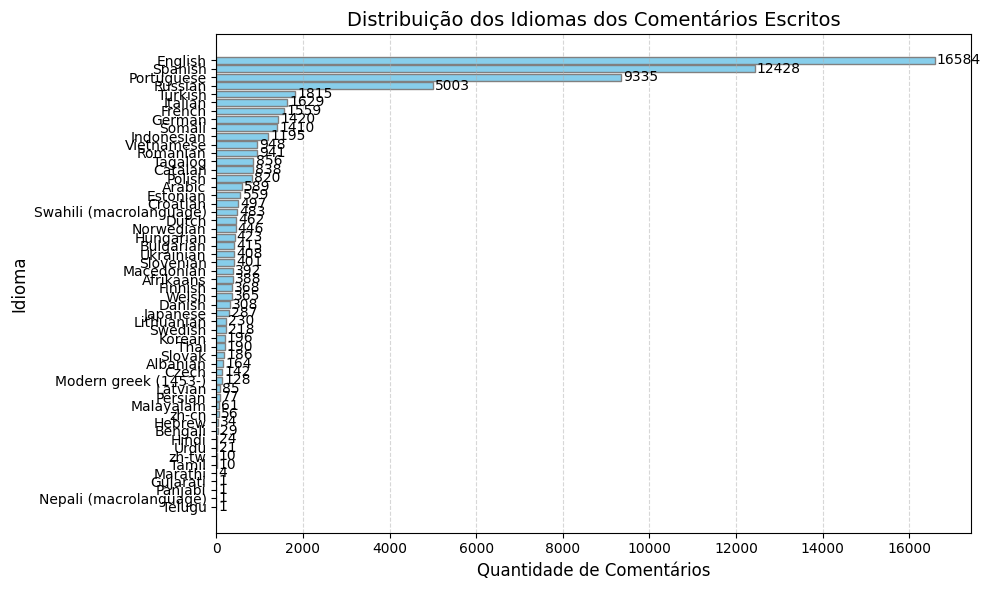

In [24]:
import matplotlib.pyplot as plt

# Filtra apenas idiomas definidos
df_plot = df_escritos[df_escritos["idioma"] != "Indefinido"]

# Conta e ordena
idioma_counts = df_plot["idioma"].value_counts().sort_values(ascending=True)

# Cria gráfico horizontal (estilo histograma de frequência)
plt.figure(figsize=(10, 6))
plt.barh(idioma_counts.index, idioma_counts.values, color="skyblue", edgecolor="gray")

plt.title("Distribuição dos Idiomas dos Comentários Escritos", fontsize=14)
plt.xlabel("Quantidade de Comentários", fontsize=12)
plt.ylabel("Idioma", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Mostra valores no final das barras
for i, v in enumerate(idioma_counts.values):
    plt.text(v + 50, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
num_indefinidos = (df_escritos["idioma"] == "Indefinido").sum()
print(num_indefinidos)

#3949


3949


In [29]:
df_youtube.to_excel("comentarios_youtube_classificados.xlsx", index=False, engine="openpyxl")
